<a href="https://colab.research.google.com/github/gabriellybc/UFES/blob/main/Eletromagnetismo%20II/Prova/ProvaMag2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zent1:  (50-4.592425496802575e-15j) 
Zo1:  100.0 
l1:  0.25


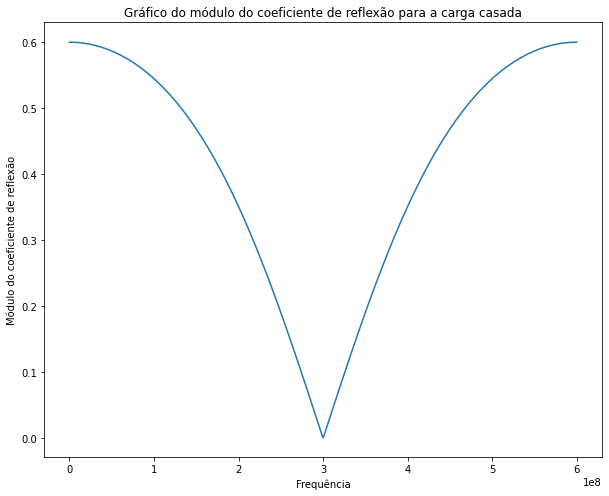


P_antes:  0.16 
P:  0.25


In [4]:
# -*- coding: utf-8 -*-
"""
Created on Tue Apr 20 17:43:03 2021

Linha_de_transmissao

@author: Gabrielly
"""
# -------------------------------- Imports ------------------------------------
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------- Funções -----------------------------------

def Impedancia_Caracteristica(R, L, G, C, frequencia): 
    #      Impedancia caracteristica Zo da linha
    #
    #  Entrada:
    #          R         - Resistência por unidade de comprimento [Ohm/m]
    #          L         - Indutância por unidade de comprimento [H/m]
    #          frequencia - Freq. de operação da linha [Hz]
    #          G          - Condutância por unidade de comprimento [S/m]
    #          C          - Capacitancia por unidade de comprimento [F/m]
    #  Saida:
    #          Zo          - Impedância caracteristica Zo da linha [Ohm]
    
    meiow = np.pi*frequencia
    N = R + 2j*meiow*L
    D = G + 2j*meiow*C
    div = N/D
    Zo =  (div)**0.5
    return Zo

def Constante_propagacao(R, L, G, C, frequencia): 
    #      Constante de propagação
    #
    #  Entrada:
    #          R         - Resistência por unidade de comprimento [Ohm/m]
    #          L         - Indutância por unidade de comprimento [H/m]
    #          frequencia - Freq. de operação da linha [Hz]
    #          G          - Condutância por unidade de comprimento [S/m]
    #          C          - Capacitancia por unidade de comprimento [F/m]
    #  Saida:
    #          Y          - Constante de propagação [1/m]
    
    meiow = np.pi*frequencia
    termo1 = R + 2j*meiow*L
    termo2 = G + 2j*meiow*C
    mult = termo1*termo2
    Y =  (mult)**0.5
    return Y

def Comprimento_onda(frequencia, u):
    #      Comprimento da onda
    #
    #  Entrada:
    #          frequencia - Freq. de operação da linha [Hz]
    #          u          - Velocidade da onda [m/s]
    #  Saida:
    #          y          - Comprimento da onda [m]
    y = u/frequencia
    return y

def Constate_fase(frequencia, u):
    #      Constante de fase
    #
    #  Entrada:
    #          frequencia - Freq. de operação da linha [Hz]
    #          u          - Velocidade da onda [m/s]
    #  Saida:
    #          B          - Constante de fase [rad/m]
    numerador = 2*np.pi*frequencia
    B = numerador/u
    return B

def Coeficiente_reflexao_tensao(Zc, Zo):
    #      Coeficiente de reflexão da tensão
    #
    #  Entrada:
    #          Zo          - Impedância caracteristica Zo da linha [Ohm]
    #          Zc          - Impedância da carga [Ohm]
    #  Saida:
    #          Tc          - Coeficiente de reflexão da tensão
    N = Zc - Zo
    D = Zc + Zo
    Tc = N/D
    return Tc

def Relacao_onda_estacionaria(Tc):
    #      Relação de onda estacionária
    #
    #  Entrada:
    #          T          - Coeficiente de reflexão da tensão
    #  Saida:
    #          s          - Relação de onda estacionária
    N = 1 + np.abs(Tc)
    D = 1 - np.abs(Tc)
    s = N/D
    return s

def Impedancia_entrada_ComPerdas(Zc, Zo, Y, l):
    #      Impedancia de entrada linhas com perdas
    #
    #  Entrada:
    #          Zo          - Impedância caracteristica Zo da linha [Ohm]
    #          Zc          - Impedância da carga [Ohm]
    #          Y          - Constante de propagação [1/m]
    #          l          - Comprimento [m]
    #  Saida:
    #          Zent          - Impedancia de entrada
    N = Zc - Zo*np.tanh(Y*l)
    D = Zo - Zc*np.tanh(Y*l)
    div = N/D
    Zent = Zo*div
    return Zent

def Impedancia_entrada_SemPerdas(Zc, Zo, Bl):
    #      Impedancia de entrada linhas com perdas
    #
    #  Entrada:
    #          Zo          - Impedância caracteristica Zo da linha [Ohm]
    #          Zc          - Impedância da carga [Ohm]
    #          Bl          - Comprimento elétrico da linha [rad]
    #  Saida:
    #          Zent          - Impedancia de entrada [Ohm]
    j = 1j 
    N = Zc + j*Zo*np.tan(Bl)
    D = Zo + j*Zc*np.tan(Bl)
    div = N/D
    Zent = Zo*div
    return Zent

def Coeficiente_reflexao_noponto_SemPerdas(Tc, B, l):
    #      Coeficiente de reflexão da tensão
    #
    #  Entrada:
    #          Tc          - Coeficiente de reflexão da tensão
    #          B          - Constante de fase [rad/m]
    #          l           - Impedância da carga [Ohm]
    #  Saida:
    #          T          - Coeficiente de reflexão no ponto
    exponencial = np.exp(-2j*B*l)
    T = Tc*exponencial
    return T

def Tensao_na_entrada(Zent, Zg, Vg):
    #      Tensão na entrada ou em um ponto
    #
    #  Entrada:
    #          Zent          - Impedancia de entrada [Ohm]
    #          Zg            - Impedancia do gerador [Ohm]
    #          Vg            - Tensão da fonte [V]
    #  Saida:
    #          Vo            - Tensão na entrada da linha [V]
    soma = Zent + Zg
    div = Zent/soma
    Vo = div*Vg
    return Vo

def Corrente_na_entrada(Zent, Zg, Vg):
    #      Corrente na entrada ou em um ponto
    #
    #  Entrada:
    #          Zent          - Impedancia de entrada [Ohm]
    #          Zg            - Impedancia do gerador [Ohm]
    #          Vg            - Tensão da fonte [V]
    #  Saida:
    #          Io            - Corrente na entrada da linha [A]
    Zsoma = Zent + Zg
    Io = Vg/Zsoma
    return Io

def Potencia_media(V, I):
    #      Potencia media
    #
    #  Entrada:
    #          V            - Tensão no ponto [V]
    #          I            - Corrente no ponto [A]
    #  Saida:
    #          Pmed            - Potencia media da entrada a uma distancia l [W]
    Iconj = I.conjugate()
    mult = V*Iconj
    real = mult.real
    Pmed = 0.5*real
    return Pmed
    
# -------------------Primeira Prova de Eletromagnetismo 2----------------------
u = 3.0E8 # Velocidade da luz no vácuo [m/s]

# Questão 1
# Considerando a linha sem perdas
Vg = 10          #[V]
f = 300E6        #[Hz]
Zg = 50         #[Ohm]
Zo = 50         #[Ohm]
Zl = 200        #[Ohm]

y = Comprimento_onda(f, u)  # [m]
B = Constate_fase(f, u)  # [rad/m]

# Letra A:
# Para fazer um casador de impedancia será feito um transformador de 1/4 de onda.
# Para isso, o comprimento da linha no casador até a carga precisa ser igual ao 
#comprimento da onda divido por quatro

l1 = (1/4)*y  # Distância da carga até o casador de quarto de onda [m]
Zo1 = (Zo*Zl)**0.5  # Impedância caracteristica no transformador de quarto de onda [Ohm]
Zent1 = Impedancia_entrada_SemPerdas(Zl, Zo1, B*l1)  # Impedancia de entrada no transformador de quarto de onda [Ohm]

print('Zent1: ', Zent1, '\nZo1: ', Zo1, '\nl1: ', l1) 

# Letra B:
f_variante = np.linspace(0, 600E6, 2**10)  # [Hz]
B_variante = Constate_fase(f_variante, u)  # [rad/m]
Bl1_variante = B_variante*l1  # [rad]
Zent1_variante = Impedancia_entrada_SemPerdas(Zl, Zo1, Bl1_variante)  # [Ohm]

Tc1_variante = Coeficiente_reflexao_tensao(Zent1_variante, Zo)
Tc1_modulo = np.abs(Tc1_variante)

plt.figure(figsize = (10, 8))
plt.plot(f_variante, Tc1_modulo)
plt.title("Gráfico do módulo do coeficiente de reflexão para a carga casada")
plt.xlabel("Frequência")
plt.ylabel("Módulo do coeficiente de reflexão")
plt.savefig('graf1.pdf')
plt.show()

#Letra C:
l0 = 0 # Distância inicial [m]
Bl0 = B*l0

Bl_antes = B*l0
Zent_antes = Impedancia_entrada_SemPerdas(Zl, Zo, Bl_antes)
Vo_antes = Tensao_na_entrada(Zent_antes, Zg, Vg)
Io_antes = Corrente_na_entrada(Zent_antes, Zg, Vg)
P_antes = Potencia_media(Vo_antes, Io_antes)

Bl1 = B*l1
Zent0 = Impedancia_entrada_SemPerdas(Zent1, Zo, Bl0)
Vo = Tensao_na_entrada(Zent0, Zg, Vg)
Io = Corrente_na_entrada(Zent0, Zg, Vg)
P = Potencia_media(Vo, Io)

print('\nP_antes: ', P_antes, '\nP: ', P)


In [2]:
# -*- coding: utf-8 -*-
"""
Created on Tue Apr 20 17:43:03 2021

Linha_de_transmissao

@author: Gabrielly
"""
# -------------------------------- Imports ------------------------------------
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------- Funções -----------------------------------

def Impedancia_Caracteristica(R, L, G, C, frequencia): 
    #      Impedancia caracteristica Zo da linha
    #
    #  Entrada:
    #          R         - Resistência por unidade de comprimento [Ohm/m]
    #          L         - Indutância por unidade de comprimento [H/m]
    #          frequencia - Freq. de operação da linha [Hz]
    #          G          - Condutância por unidade de comprimento [S/m]
    #          C          - Capacitancia por unidade de comprimento [F/m]
    #  Saida:
    #          Zo          - Impedância caracteristica Zo da linha [Ohm]
    
    meiow = np.pi*frequencia
    N = R + 2j*meiow*L
    D = G + 2j*meiow*C
    div = N/D
    Zo =  (div)**0.5
    return Zo

def Constante_propagacao(R, L, G, C, frequencia): 
    #      Constante de propagação
    #
    #  Entrada:
    #          R         - Resistência por unidade de comprimento [Ohm/m]
    #          L         - Indutância por unidade de comprimento [H/m]
    #          frequencia - Freq. de operação da linha [Hz]
    #          G          - Condutância por unidade de comprimento [S/m]
    #          C          - Capacitancia por unidade de comprimento [F/m]
    #  Saida:
    #          Y          - Constante de propagação [1/m]
    
    meiow = np.pi*frequencia
    termo1 = R + 2j*meiow*L
    termo2 = G + 2j*meiow*C
    mult = termo1*termo2
    Y =  (mult)**0.5
    return Y

def Capacitancia_porMetro_SemPerdas(Zo, frequencia, B): 
    #      Capacitancia por metro em linha sem perda
    #
    #  Entrada:
    #          Zo          - Impedância caracteristica Zo da linha [Ohm]
    #          frequencia - Freq. de operação da linha [Hz]
    #          B          - Constante de fase [rad/m]
    #  Saida:
    #          C          - Capacitancia por unidade de comprimento [F/m]
    
    w = 2*np.pi*frequencia
    Ro = Zo
    denominador = w*Ro
    C = B/denominador
    return C

def Indutancia_porMetro_SemPerdas(Zo, frequencia, B): 
    #      Capacitancia por metro em linha sem perda
    #
    #  Entrada:
    #          Zo          - Impedância caracteristica Zo da linha [Ohm]
    #          frequencia - Freq. de operação da linha [Hz]
    #          B          - Constante de fase [rad/m]
    #  Saida:
    #          L         - Indutância por unidade de comprimento [H/m]
    
    w = 2*np.pi*frequencia
    Ro = Zo
    numerador = Ro*B
    L = numerador/w
    return L

def Comprimento_onda(frequencia, u):
    #      Comprimento da onda
    #
    #  Entrada:
    #          frequencia - Freq. de operação da linha [Hz]
    #          u          - Velocidade da onda [m/s]
    #  Saida:
    #          y          - Comprimento da onda [m/s]
    y = u/frequencia
    return y

def Constate_fase(frequencia, u):
    #      Constante de fase
    #
    #  Entrada:
    #          frequencia - Freq. de operação da linha [Hz]
    #          u          - Velocidade da onda [m/s]
    #  Saida:
    #          B          - Constante de fase [rad/m]
    numerador = 2*np.pi*frequencia
    B = numerador/u
    return B

def Coeficiente_reflexao_tensao(Zc, Zo):
    #      Coeficiente de reflexão da tensão
    #
    #  Entrada:
    #          Zo          - Impedância caracteristica Zo da linha [Ohm]
    #          Zc          - Impedância da carga [Ohm]
    #  Saida:
    #          Tc          - Coeficiente de reflexão da tensão
    N = Zc - Zo
    D = Zc + Zo
    Tc = N/D
    return Tc

def Relacao_onda_estacionaria(Tc):
    #      Relação de onda estacionária
    #
    #  Entrada:
    #          T          - Coeficiente de reflexão da tensão
    #  Saida:
    #          s          - Relação de onda estacionária
    N = 1 + np.abs(Tc)
    D = 1 - np.abs(Tc)
    s = N/D
    return s

def Impedancia_entrada_ComPerdas(Zc, Zo, Y, l):
    #      Impedancia de entrada linhas com perdas
    #
    #  Entrada:
    #          Zo          - Impedância caracteristica Zo da linha [Ohm]
    #          Zc          - Impedância da carga [Ohm]
    #          Y          - Constante de propagação [1/m]
    #          l          - Comprimento [m]
    #  Saida:
    #          Zent          - Impedancia de entrada
    N = Zc + Zo*np.tanh(Y*l)
    D = Zo + Zc*np.tanh(Y*l)
    div = N/D
    Zent = Zo*div
    return Zent

def Impedancia_entrada_SemPerdas(Zc, Zo, Bl):
    #      Impedancia de entrada linhas com perdas
    #
    #  Entrada:
    #          Zo          - Impedância caracteristica Zo da linha [Ohm]
    #          Zc          - Impedância da carga [Ohm]
    #          Bl          - Comprimento elétrico da linha [rad]
    #  Saida:
    #          Zent          - Impedancia de entrada [Ohm]
    j = 1j 
    N = Zc + j*Zo*np.tan(Bl)
    D = Zo + j*Zc*np.tan(Bl)
    div = N/D
    Zent = Zo*div
    return Zent

def Coeficiente_reflexao_noponto_SemPerdas(Tc, B, l):
    #      Coeficiente de reflexão da tensão
    #
    #  Entrada:
    #          Tc          - Coeficiente de reflexão da tensão
    #          B          - Constante de fase [rad/m]
    #          l           - Impedância da carga [Ohm]
    #  Saida:
    #          T          - Coeficiente de reflexão no ponto
    exponencial = np.exp(-2j*B*l)
    T = Tc*exponencial
    return T

def Tensao_na_entrada(Zent, Zg, Vg):
    #      Tensão na entrada ou em um ponto
    #
    #  Entrada:
    #          Zent          - Impedancia de entrada [Ohm]
    #          Zg            - Impedancia do gerador [Ohm]
    #          Vg            - Tensão da fonte [V]
    #  Saida:
    #          Vo            - Tensão na entrada da linha [V]
    soma = Zent + Zg
    div = Zent/soma
    Vo = div*Vg
    return Vo

def Corrente_na_entrada(Zent, Zg, Vg):
    #      Corrente na entrada ou em um ponto
    #
    #  Entrada:
    #          Zent          - Impedancia de entrada [Ohm]
    #          Zg            - Impedancia do gerador [Ohm]
    #          Vg            - Tensão da fonte [V]
    #  Saida:
    #          Io            - Corrente na entrada da linha [A]
    Zsoma = Zent + Zg
    Io = Vg/Zsoma
    return Io

def Potencia_media(V, I):
    #      Potencia media
    #
    #  Entrada:
    #          V            - Tensão no ponto [V]
    #          I            - Corrente no ponto [A]
    #  Saida:
    #          Pmed            - Potencia media da entrada a uma distancia l [W]
    Iconj = I.conjugate()
    mult = V*Iconj
    real = mult.real
    Pmed = 0.5*real
    return Pmed
    
# -------------------Primeira Prova de Eletromagnetismo 2----------------------
u = 3.0E8 # Velocidade da luz no vácuo [m/s]


# Questão 2
# Considerando a linha sem perdas
Vg = 10  #[V]
f = 300E6  #[Hz]
Zg = 50  #[Ohm]
Zl = 50  #[Ohm]
Zo1 = 100  #[Ohm]
Zo2 = 200  #[Ohm]
Zo3 = 100  #[Ohm]
Zo4 = 200  #[Ohm]
l1 = 25/100  #[m]
l2 = 130/100  #[m]
l3 = 25/100  #[m]
l4 = 150/100  #[m]

B = Constate_fase(f, u)  # [rad/m]

BlB = B*l1  # [rad]
ZentB = Impedancia_entrada_SemPerdas(Zl, Zo1, BlB)  # [Ohm]

BlC = B*l2  # [rad]
ZlC = ZentB  # [Ohm]
ZentC = Impedancia_entrada_SemPerdas(ZlC, Zo2, BlC)  # [Ohm]

BlD = B*l3  # [rad]
ZlD = ZentC  # [Ohm]
ZentD = Impedancia_entrada_SemPerdas(ZlD, Zo3, BlD)  # [Ohm]

BlE = B*l4  # [rad]
ZlE = ZentD  # [Ohm]
ZentE = Impedancia_entrada_SemPerdas(ZlE, Zo4, BlE)  # [Ohm]

print('\nZentB: ', ZentB, '\nZentC: ', ZentC, '\nZentD: ', ZentD, '\nZentE: ', ZentE)

#Letra A:
TcA = Coeficiente_reflexao_tensao(Zl, Zo1)
TcB = Coeficiente_reflexao_tensao(ZentB, Zo2)
TcC = Coeficiente_reflexao_tensao(ZentC, Zo3)
TcD = Coeficiente_reflexao_tensao(ZentD, Zo4)
TE = Coeficiente_reflexao_noponto_SemPerdas(TcD, B, l4)
print('\nTcA: ', TcA, '\nTcB: ', TcB, '\nTcC: ', TcC, '\nTcD: ', TcD, '\nTE: ', TE)

# Letra B:
Io = Corrente_na_entrada(ZentE, Zg, Vg)
Vo = Tensao_na_entrada(ZentE, Zg, Vg)
PE = Potencia_media(Vo, Io)
print('\n PE: ', PE)


ZentB:  (200+1.83697019872103e-14j) 
ZentC:  (200-1.6705861648133367e-14j) 
ZentD:  (50-4.1596008476923323e-16j) 
ZentE:  (50-6.930234253680784e-14j)

TcA:  -0.3333333333333333 
TcB:  (2.109037194368238e-33+4.5924254968025755e-17j) 
TcC:  (0.3333333333333333-3.7124136995851926e-17j) 
TcD:  (-0.6-2.6621445425230927e-18j) 
TE:  (-0.6-4.435349922355702e-16j)

 PE:  0.25
